In [33]:
import numpy as np
import pandas as pd
import plotly.express as px
import psycopg2
from psycopg2 import sql
import matplotlib.pyplot as plt

In [34]:
try:
    # Connexion à la base de données
    connection = psycopg2.connect(
        user='perez',
        host='postgresql-perez.alwaysdata.net',
        database='perez_vercel_db',
        password='jo2024!',
        port=5432,     
    )

    # Création d'un curseur pour exécuter des commandes SQL
    cursor = connection.cursor()
    cur = connection.cursor()
    
    # Exemple de requête SQL
    cursor.execute("SELECT * FROM athletes_jo ;")
    # Récupération des résultats dans un DataFrame
    columns = [desc[0] for desc in cursor.description]
    df_athletes_jo = pd.DataFrame(cursor.fetchall(), columns=columns)
    cur.execute("SELECT * FROM results_jo ;")
   # Récupération des résultats dans un DataFrame
    col = [desc[0] for desc in cur.description]
    df_results_jo = pd.DataFrame(cur.fetchall(), columns=col)
   
except (Exception, psycopg2.Error) as error:
    print("Erreur lors de la connexion à PostgreSQL", error)

finally:
    # Fermeture de la connexion
    if connection:
        cursor.close()
        connection.close()
        print("La connexion PostgreSQL est fermée")




La connexion PostgreSQL est fermée


In [35]:
df_results_jo

,id,discipline_title,event_title,game_slug,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,athlete_full_name,game_location,game_season,game_year
0,1,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",false,1,Italy,IT,None,China,Winter,2022
1,2,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",false,2,Norway,NO,None,China,Winter,2022
2,3,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",false,3,Sweden,SE,None,China,Winter,2022
3,4,Curling,Mixed Doubles,beijing-2022,GameTeam,None,"[('Jennifer DODDS', 'https://olympics.com/en/a...",false,4,United Kingdom,GB,None,China,Winter,2022
4,5,Curling,Mixed Doubles,beijing-2022,GameTeam,None,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",false,5,Canada,CA,None,China,Winter,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162799,162800,Weightlifting,heavyweight - two hand lift men,athens-1896,Athlete,SILVER,None,None,2,United Kingdom,GB,Launceston ELLIOT,Greece,Summer,1896
162800,162801,Weightlifting,heavyweight - two hand lift men,athens-1896,Athlete,BRONZE,None,None,3,Greece,GR,Sotirios VERSIS,Greece,Summer,1896
162801,162802,Weightlifting,heavyweight - two hand lift men,athens-1896,Athlete,None,None,true,4,Greece,GR,Georgios PAPASIDERIS,Greece,Summer,1896
162802,162803,Weightlifting,heavyweight - two hand lift men,athens-1896,Athlete,None,None,true,4,Germany,DE,Carl SCHUHMANN,Greece,Summer,1896


In [36]:
df_athletes_jo

,id,athlete_full_name,games_participations,first_game,athlete_year_birth
0,1,Cooper WOODS-TOPALOVIC,1,Beijing 2022,2000.0
1,2,Felix ELOFSSON,2,PyeongChang 2018,1995.0
2,3,Dylan WALCZYK,1,Beijing 2022,1993.0
3,4,Olli PENTTALA,1,Beijing 2022,1995.0
4,5,Dmitriy REIKHERD,1,Beijing 2022,1989.0
...,...,...,...,...,...
75899,75900,Douglas WEIGLE,1,Innsbruck 1976,1955.0
75900,75901,Stefania BERTELE,1,Innsbruck 1976,1957.0
75901,75902,Walter CECCONI,1,Innsbruck 1976,1957.0
75902,75903,Susan KELLEY,1,Innsbruck 1976,1954.0


NETTOYAGE DE DONNEES

In [55]:
#Extraction des données importantes 
extracted_results = df_results_jo[['discipline_title', 'event_title','participant_type','medal_type','country_name','athlete_full_name','game_slug','game_year','game_season']]
print("\nColonnes extraites:")
#nettoyage de données
extracted_results= extracted_results.dropna()

extracted_results


Colonnes extraites:


,discipline_title,event_title,participant_type,medal_type,country_name,athlete_full_name,game_slug,game_year,game_season
36,Freestyle Skiing,Men's Moguls,Athlete,BRONZE,Japan,Ikuma HORISHIMA,beijing-2022,2022,Winter
46,Freestyle Skiing,Men's Moguls,Athlete,SILVER,Canada,Mikael KINGSBURY,beijing-2022,2022,Winter
48,Freestyle Skiing,Men's Moguls,Athlete,GOLD,Sweden,Walter WALLBERG,beijing-2022,2022,Winter
64,Freestyle Skiing,Men's Freeski Halfpipe,Athlete,GOLD,New Zealand,Nico PORTEOUS,beijing-2022,2022,Winter
66,Freestyle Skiing,Men's Freeski Halfpipe,Athlete,SILVER,United States of America,David WISE,beijing-2022,2022,Winter
...,...,...,...,...,...,...,...,...,...
162795,Weightlifting,heavyweight - one hand lift men,Athlete,SILVER,Denmark,Viggo JENSEN,athens-1896,1896,Summer
162796,Weightlifting,heavyweight - one hand lift men,Athlete,BRONZE,Greece,Alexandros Nikolopoulos,athens-1896,1896,Summer
162798,Weightlifting,heavyweight - two hand lift men,Athlete,GOLD,Denmark,Viggo JENSEN,athens-1896,1896,Summer
162799,Weightlifting,heavyweight - two hand lift men,Athlete,SILVER,United Kingdom,Launceston ELLIOT,athens-1896,1896,Summer


In [56]:
#Extraction des données importantes 
extracted_athletes = df_athletes_jo[['games_participations','athlete_full_name']]
print("\nColonnes extraites:")
#nettoyage de données
extracted_athletes= extracted_athletes.dropna()

extracted_athletes



Colonnes extraites:


,games_participations,athlete_full_name
0,1,Cooper WOODS-TOPALOVIC
1,2,Felix ELOFSSON
2,1,Dylan WALCZYK
3,1,Olli PENTTALA
4,1,Dmitriy REIKHERD
...,...,...
75899,1,Douglas WEIGLE
75900,1,Stefania BERTELE
75901,1,Walter CECCONI
75902,1,Susan KELLEY


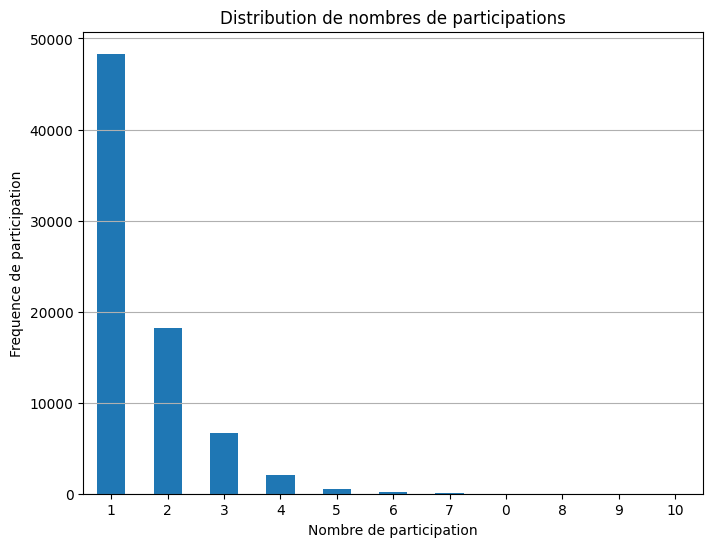

In [57]:
# Compter le nombre de participations
games_parti = extracted_athletes['games_participations'].value_counts(dropna=False)

# Créer un graphique à barres pour visualiser la distribution
plt.figure(figsize=(8, 6))
games_parti.plot(kind='bar')
plt.title('Distribution de nombres de participations')
plt.xlabel('Nombre de participation')
plt.ylabel('Frequence de participation')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [71]:
# Faire une jointure sur la colonne 'athlete_full_name'
merged_df = pd.merge(extracted_results, extracted_athletes, on='athlete_full_name')

# Afficher le DataFrame résultant de la jointure
print("DataFrame résultant de la jointure :")
merged_df
# Convertir la colonne 'game_year' en entiers
merged_df['game_year'] = merged_df['game_year'].astype(int)

DataFrame résultant de la jointure :


In [128]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
import numpy as np

# Filtrer pour ne garder que les JO d'été et les médailles de la France
df_summer = merged_df[(merged_df['game_season'] == 'Summer')]

# Ajouter une colonne pour le nombre de participations au JO à l'instant t pour chaque pays et chaque JO
df_summer['participations_t'] = df_summer.groupby(['country_name', 'game_year']).cumcount() + 1

# Ajouter une colonne pour le nombre de médailles gagnées aux JO précédents (t-1) pour chaque pays et chaque JO
df_summer['medals_t_1'] = df_summer.groupby('country_name')['medal_type'].shift(1)
df_summer['medals_t_1'] = df_summer['medals_t_1'].fillna('None')

# Encoder les types de médailles avec OneHotEncoder
encoder_medal_type = OneHotEncoder(sparse_output=False)
encoded_medals = encoder_medal_type.fit_transform(df_summer[['medal_type']])

encoder_medals_t_1 = OneHotEncoder(sparse_output=False)
encoded_medals_t_1 = encoder_medals_t_1.fit_transform(df_summer[['medals_t_1']])

# Ajouter les colonnes encodées au DataFrame
encoded_columns = encoder_medal_type.get_feature_names_out(['medal_type'])
encoded_columns_t_1 = encoder_medals_t_1.get_feature_names_out(['medals_t_1'])
df_summer = df_summer.join(pd.DataFrame(encoded_medals, columns=encoded_columns))
df_summer = df_summer.join(pd.DataFrame(encoded_medals_t_1, columns=encoded_columns_t_1))

# Séparer les données en un ensemble d'entraînement (avant 2020) et un ensemble de test (JO 2020)
train_data = df_summer[df_summer['game_year'] < 2020]
test_data = df_summer[df_summer['game_year'] == 2020]

# Séparer les caractéristiques (X) et la cible (y) pour l'ensemble d'entraînement
X_train = train_data[['participations_t'] + list(encoded_columns_t_1)]
X_train=X_train.dropna()
y_train = train_data[['participations_t'] +list(encoded_columns)]
y_train=y_train.dropna()

# Entraîner le modèle de régression linéaire
model = LinearRegression()

# Effectuer une validation croisée
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
cross_val_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')

# Afficher les scores de validation croisée
print("Scores de validation croisée (MSE négatif) :", cross_val_scores)
print("Moyenne des scores de validation croisée :", cross_val_scores.mean())
print("Écart-type des scores de validation croisée :", cross_val_scores.std())

# Entraîner le modèle de régression linéaire sur l'ensemble d'entraînement complet
model.fit(X_train, y_train)

# Faire des prédictions pour les JO 2024 (en supposant que les participations_t et medals_t_1 pour 2024 sont connues)
X_2024 = pd.DataFrame({
    'participations_t': [50],  # Par exemple, si la France a participé quatre fois
 'medals_t_1_BRONZE': [0], 'medals_t_1_GOLD': [1],'medals_t_1_None': [0], 'medals_t_1_SILVER': [0]  # Par exemple, si la France a gagné 1 médaille d'or aux JO précédents
})
predictions_2024 = model.predict(X_2024)

# Afficher les résultats de la prédiction pour 2024
predicted_medals_2024 = encoder_medal_type.inverse_transform(predictions_2024)
print(f"Prédictions de médailles pour la France en 2024 : {predicted_medals_2024}")

# Visualiser les résultats
medal_counts = np.sum(predictions_2024, axis=0)
medal_types = encoder_medal_type.categories_[0]
plt.bar(medal_types, medal_counts, color=['gold', 'silver', 'brown'])
plt.xlabel('Type de Médaille')
plt.ylabel('Nombre Prévu')
plt.title('Nombre de Médailles Prévues pour la France en 2024')
plt.show()


C:\Users\utilisateur\AppData\Local\Temp\ipykernel_8212\2515201482.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summer['participations_t'] = df_summer.groupby(['country_name', 'game_year']).cumcount() + 1
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_8212\2515201482.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summer['medals_t_1'] = df_summer.groupby('country_name')['medal_type'].shift(1)
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_8212\2515201482.py:16: SettingWithCopyWarning

Scores de validation croisée (MSE négatif) : [-0.16668864 -0.16615619 -0.16617576 -0.16601833 -0.16608665]
Moyenne des scores de validation croisée : -0.1662251153280085
Écart-type des scores de validation croisée : 0.00023831583499554966


ValueError: Shape of the passed X data is not correct. Expected 3 columns, got 4.

In [121]:
X_train

,participations_t,medals_t_1_BRONZE,medals_t_1_GOLD,medals_t_1_None,medals_t_1_SILVER
338,1,0.0,1.0,0.0,0.0
342,1,0.0,0.0,0.0,1.0
344,1,1.0,0.0,0.0,0.0
346,1,0.0,0.0,0.0,1.0
355,1,1.0,0.0,0.0,0.0
...,...,...,...,...,...
11379,7,0.0,1.0,0.0,0.0
11380,32,0.0,0.0,0.0,1.0
11381,33,1.0,0.0,0.0,0.0
11382,10,0.0,1.0,0.0,0.0


In [119]:
y_train

,participations_t,medal_type_BRONZE,medal_type_GOLD,medal_type_SILVER
338,1,0.0,1.0,0.0
342,1,0.0,1.0,0.0
344,1,1.0,0.0,0.0
346,1,0.0,1.0,0.0
355,1,0.0,0.0,1.0
...,...,...,...,...
11379,7,1.0,0.0,0.0
11380,32,1.0,0.0,0.0
11381,33,0.0,0.0,1.0
11382,10,0.0,1.0,0.0


In [92]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np

# Filtrer pour ne garder que les JO d'été et les médailles de la France
df_summer = merged_df[(merged_df['game_season'] == 'Summer') & (merged_df['country_name'] == 'France')]

# Ajouter une colonne pour le nombre de participations au JO à l'instant t pour chaque pays et chaque JO
df_summer['participations_t'] = df_summer.groupby(['country_name', 'game_year']).cumcount() + 1

# Ajouter une colonne pour le nombre de médailles gagnées aux JO précédents (t-1) pour chaque pays et chaque JO
df_summer['medals_t_1'] = df_summer.groupby('country_name')['medal_type'].shift(1)
df_summer['medals_t_1'] = df_summer['medals_t_1'].fillna(0)
# Convertir la colonne 'game_year' en entiers
df_summer['medals_t_1'] = df_summer['medals_t_1'].astype(str)
# Encoder les types de médailles avec OneHotEncoder
encoder_medal_type = OneHotEncoder(sparse_output=False)
encoded_medals = encoder_medal_type.fit_transform(df_summer[['medal_type']])

encoder_medals_t_1 = OneHotEncoder(sparse_output=False)
encoded_medals_t_1 = encoder_medals_t_1.fit_transform(df_summer[['medals_t_1']])

# Ajouter les colonnes encodées au DataFrame
encoded_columns = encoder_medal_type.get_feature_names_out(['medal_type'])
encoded_columns_t_1 = encoder_medals_t_1.get_feature_names_out(['medals_t_1'])
df_summer = df_summer.join(pd.DataFrame(encoded_medals, columns=encoded_columns))
df_summer = df_summer.join(pd.DataFrame(encoded_medals_t_1, columns=encoded_columns_t_1))
# Séparer les données en un ensemble d'entraînement (avant 2020) et un ensemble de test (JO 2020)
train_data = df_summer[df_summer['game_year'] < 2020]
test_data = df_summer[df_summer['game_year'] == 2020]

# Séparer les caractéristiques (X) et la cible (y) pour l'ensemble d'entraînement
X_train = train_data[['participations_t'] + list(encoded_columns_t_1)]
X_train = X_train.dropna()
y_train = train_data[['participations_t'] +list(encoded_columns)]
y_train = y_train.dropna()

# Entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Faire des prédictions pour les JO 2024 (en supposant que les participations_t et medals_t_1 pour 2024 sont connues)
X_2024 = pd.DataFrame({
    'participations_t':[80], 'medals_t_1_0': [0],  # Par exemple, si la France a participé quatre fois
    'medals_t_1_BRONZE': [0], 'medals_t_1_GOLD': [1],'medals_t_1_SILVER': [0]  # Par exemple, si la France a gagné 1 médaille d'or aux JO précédents
})
predictions_2024 = model.predict(X_2024)

# Afficher les résultats de la prédiction pour 2024
predicted_medals_2024 = encoder_medals_t_1.inverse_transform(predictions_2024)
print(f"Prédictions de médailles pour la France en 2024 : {predicted_medals_2024}")

# Visualiser les résultats
medal_counts = np.sum(predictions_2024, axis=0)
medal_types = encoder_medal_type.categories_[0]
# plt.bar(medal_types, medal_counts, color=['gold', 'silver', 'brown'])
# plt.xlabel('Type de Médaille')
# plt.ylabel('Nombre Prévu')
# plt.title('Nombre de Médailles Prévues pour la France en 2024')
# plt.show()



Prédictions de médailles pour la France en 2024 : [['0']]


C:\Users\utilisateur\AppData\Local\Temp\ipykernel_8212\2286134459.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summer['participations_t'] = df_summer.groupby(['country_name', 'game_year']).cumcount() + 1
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_8212\2286134459.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summer['medals_t_1'] = df_summer.groupby('country_name')['medal_type'].shift(1)
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_8212\2286134459.py:15: SettingWithCopyWarning

In [86]:
X_train

,participations_t,medals_t_1_0,medals_t_1_BRONZE,medals_t_1_GOLD,medals_t_1_SILVER
344,1,0.0,0.0,0.0,1.0


In [84]:
y_train

,medal_type_BRONZE,medal_type_GOLD,medal_type_SILVER
344,0.0,1.0,0.0
